In [0]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import statistics
from sklearn import svm
from sklearn.metrics import accuracy_score, plot_roc_curve, plot_precision_recall_curve, roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

In [0]:
fmnist = fetch_openml("Fashion-MNIST", data_home="data/fmnist", cache=True)
zipped_fmnist = list(zip(fmnist.data, fmnist.target))

In [0]:
# wybieram próbki
sample_size = [70000, 40000, 10000]
fmnist_random = {}

for size in sample_size:
    fmnist_random[size] = random.sample(zipped_fmnist, size)

In [0]:
pca_dim = [10, 50, 200]
x_pca = {} # x_pca[(sample_size, dimension)]
y_pca = {} # y[sample_size]

for dim in pca_dim:
    pca = PCA(dim)
    for size in sample_size:
        x, y = zip(*(fmnist_random[size]))
        x = np.asarray(x)
        y_pca[size] = np.asarray(y)
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)
        x_pca[size, dim] = pca.fit_transform(x_scaled)
        print(x_pca[(size,dim)].shape)

(70000, 10)
(40000, 10)
(10000, 10)
(70000, 50)
(40000, 50)
(10000, 50)
(70000, 200)
(40000, 200)
(10000, 200)


## Przykładowy wygląd

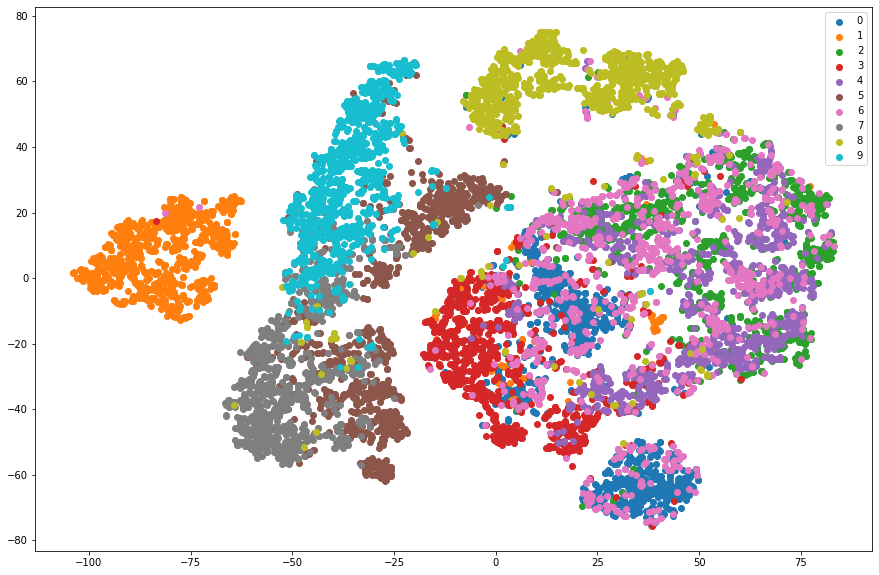

In [0]:
size = 10000
dim = 50

x_embedded = TSNE(n_components=2).fit_transform(x_pca[size, dim])
plt.figure(figsize=(15,10))

for c, ids in zip(mcolors.TABLEAU_COLORS, [str(i) for i in range(dim)]):
    plt.scatter(x_embedded[y_pca[size] == ids, 0], x_embedded[y_pca[size] == ids, 1], c=c, label=ids)
plt.legend()
plt.show()

## AdaBoost

In [0]:
for size, dim in x_pca.keys():
    x_train, x_test, y_train, y_test = train_test_split(x_pca[size, dim], y_pca[size], train_size=0.8)
    classifier = AdaBoostClassifier(n_estimators=10, random_state=7)
    classifier.fit(x_train, y_train)
    print("SIZE = {}, DIMENSION = {}, SCORE = {}".format(size, dim, classifier.score(x_test, y_test)))
    

SIZE = 70000, DIMENSION = 10, SCORE = 0.5303571428571429
SIZE = 40000, DIMENSION = 10, SCORE = 0.4735
SIZE = 10000, DIMENSION = 10, SCORE = 0.4905
SIZE = 70000, DIMENSION = 50, SCORE = 0.5246428571428572
SIZE = 40000, DIMENSION = 50, SCORE = 0.456625
SIZE = 10000, DIMENSION = 50, SCORE = 0.533
SIZE = 70000, DIMENSION = 200, SCORE = 0.5255714285714286
SIZE = 40000, DIMENSION = 200, SCORE = 0.45775
SIZE = 10000, DIMENSION = 200, SCORE = 0.5385


### Na oryginalnym 

In [0]:
x, y = zip(*(zipped_fmnist))
x = np.asarray(x)
y = np.asarray(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
classifier = AdaBoostClassifier(n_estimators=10, random_state=7)
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.4431428571428571

## SVM

In [0]:
for size, dim in x_pca.keys():
    x_train, x_test, y_train, y_test = train_test_split(x_pca[size, dim], y_pca[size], train_size=0.8)
    classifier = svm.SVC()
    classifier.fit(x_train, y_train)
    print("SIZE = {}, DIMENSION = {}, SCORE = {}".format(size, dim, classifier.score(x_test, y_test)))
    

SIZE = 70000, DIMENSION = 10, SCORE = 0.8120714285714286
SIZE = 40000, DIMENSION = 10, SCORE = 0.810375
SIZE = 10000, DIMENSION = 10, SCORE = 0.7805
SIZE = 70000, DIMENSION = 50, SCORE = 0.8767142857142857
SIZE = 40000, DIMENSION = 50, SCORE = 0.87125
SIZE = 10000, DIMENSION = 50, SCORE = 0.8455
SIZE = 70000, DIMENSION = 200, SCORE = 0.8919285714285714
SIZE = 40000, DIMENSION = 200, SCORE = 0.884625
SIZE = 10000, DIMENSION = 200, SCORE = 0.866


Na oryginalnym

In [0]:
x, y = zip(*(zipped_fmnist))
x = np.asarray(x)
y = np.asarray(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
classifier = svm.SVC()
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.8884285714285715

#Cross-validation

ROC

In [0]:
#nie działa, zrobiłem poniżej dla multiclass
def plot_roc(train_data, train_labels, test_data, test_labels, c, kernel):
    classifier = svm.SVC(kernel = kernel, C =c)

    classifier.fit(train_data, train_labels)
    plot_roc_curve(classifier, test_data, test_labels)

    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])

    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [0]:
for size, dim in x_pca.keys():
    x_train, x_test, y_train, y_test = train_test_split(x_pca[(size, dim)], y_pca[size], train_size=0.8)
    plot_roc(x_train, y_train, x_test, y_test, 1, 'rdf')
    

ValueError: ignored

In [0]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()



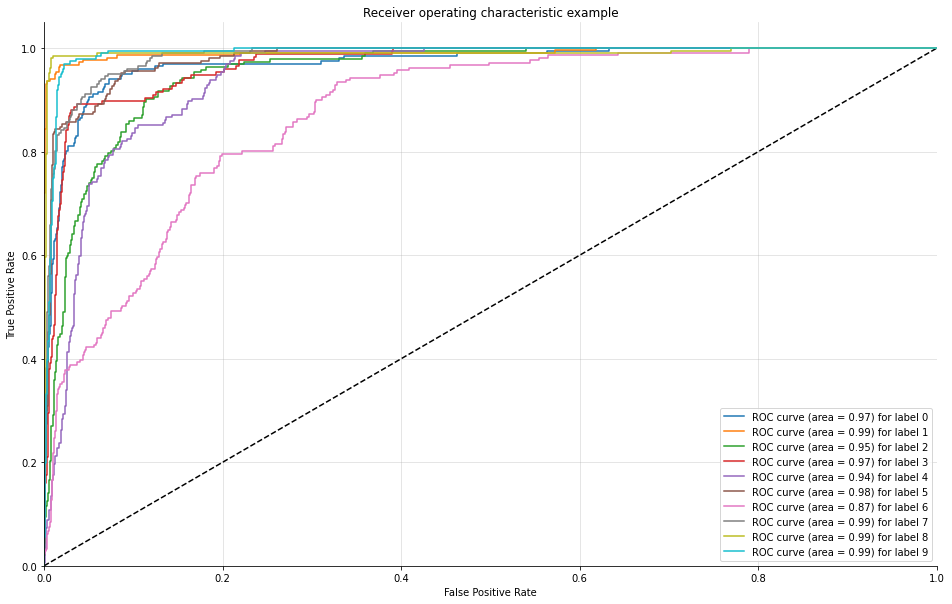

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_pca[(10000, 10)], y_pca[10000], train_size=0.8)

classifier = svm.SVC()

classifier.fit(x_train, y_train)

plot_multiclass_roc(classifier, x_test, y_test, n_classes=10, figsize=(16, 10))



Precision Recall

In [0]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_multiclass_pr(clf, X_test, y_test, n_classes, figsize=(16, 10)):
  y_score = clf.decision_function(X_test)
  precision = dict()
  recall = dict()

  y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
  for i in range(n_classes):
      precision[i], recall[i], _ = precision_recall_curve(y_test_dummies[:, i], y_score[:, i])
      plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.legend(loc="best")
  plt.title("precision vs. recall curve")
  plt.show()

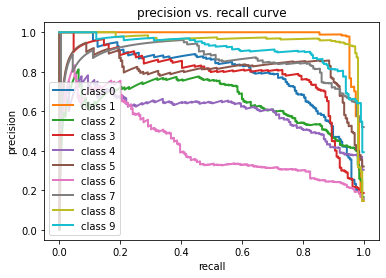

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_pca[(10000, 10)], y_pca[10000], train_size=0.8)

classifier = svm.SVC()

classifier.fit(x_train, y_train)

#plot_multiclass_roc(classifier, x_test, y_test, n_classes=10, figsize=(16, 10))
plot_multiclass_pr(classifier, x_test, y_test, n_classes=10, figsize=(16, 10))